<a href="https://colab.research.google.com/github/LiHantang/Home_Market_Analysis/blob/main/Housing_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 0: Load data and packages

In [ ]:
!wget https://storage.googleapis.com/homevest-interviewing/data-science-biz-ops-analyst/mls-sample.csv

--2021-11-14 06:14:24--  https://storage.googleapis.com/homevest-interviewing/data-science-biz-ops-analyst/mls-sample.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.11.128, 74.125.26.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.11.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90969377 (87M) [text/csv]
Saving to: ‘mls-sample.csv.4’

mls-sample.csv.4    100%[===================>]  86.75M   202MB/s    in 0.4s    

2021-11-14 06:14:25 (202 MB/s) - ‘mls-sample.csv.4’ saved [90969377/90969377]



In [ ]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.preprocessing as preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
!pip install pyproj==1.9.6

In [ ]:
from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [ ]:
homes = pd.read_csv('mls-sample.csv', na_values={'sqft':0}) # if sqft equals to zero or one, then it's treated as na value
homes.shape

(8168, 60)

In [ ]:
homes.head(3)

,id,street,city,state,zip,county,beds,baths_full,baths_half,description,listing_date,list_price,sqft,lotsize_sqft,property_type,school_district,subdivision,lat,lng,year_built,features_appliances_and_equipment,features_bathrooms,features_bedrooms,features_community,features_dining_room,features_doors,features_energy_saving,features_exterior_features,features_fence,features_fireplaces,features_foundation,features_fees,features_garage,features_heating,features_home_owners_association,features_house,features_interior,features_interior_features,features_kitchen,features_laundry,features_location,features_lot,features_miscellaneous,features_parking,features_pool,features_property,features_property_access,features_roof,features_schools,features_security_system,features_sewer,features_spa,features_taxes,features_water,features_amenities,features_disclosures,features_utilities,features_windows_and_doors,xf_attributes,photo_urls
0,1,115 Kings Ridge Dr,Peachtree City,GA,30269,Peachtree City,4,2,0,This Peachtree City two-story home offers a pa...,2021-04-19 04:00:00+00,271000,1880.000,13717.000,single family home,NaN,NaN,33.404,-84.611,1973,nan,NaN,NaN,nan,NaN,nan,nan,nan,nan,NaN,nan,NaN,"[""2 garage spaces""]",[],NaN,NaN,nan,NaN,[],NaN,NaN,NaN,nan,"[""Garage Attached""]",[],NaN,NaN,NaN,"[""Elementary school: Kedron"",""Junior high scho...",nan,NaN,nan,NaN,NaN,nan,nan,NaN,nan,{},"[""https://opendoor2.imgix.net/https%3A%2F%2Fli..."
1,2,3729 Gardenwick Road Unit 15,Powder Springs,GA,30127,Cobb,3,2,1,"Stafford, an eye-catching two-story interior u...",2021-02-15 00:00:00+00,320443,1874.000,nan,Townhouse,1,Sweetwater Landing Townhomes,33.863,-84.696,2021,nan,"[""2 full bathrooms"",""2 full bathrooms on upper...","[""3 bedrooms"",""3 bedrooms on upper level"",""Ove...",nan,"[""Ceiling Fan(s)"",""Central Air"",""Window Unit(s...",nan,nan,nan,nan,"[""1 fireplace"",""Factory Built"",""Family Room""]",nan,NaN,NaN,"[""Electric"",""Zoned""]","[""Association Fee: $135"",""Association Fee Freq...","[""Architecture: Traditional"",""Built in 2021"",""...",nan,"[""Entrance Foyer"",""Double Vanity"",""High Ceilin...","[""Eat-in Kitchen"",""Kitchen Island"",""Pantry"",""P...","[""In Hall"",""Laundry Room"",""Upper Floor""]",NaN,"[""Lot: Not Available"",""Back Yard"",""Front Yard""...",nan,"[""Attached"",""Driveway"",""Garage"",""Garage Faces ...","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Powder Springs"",""Middle S...",nan,"[""Public Sewer""]",nan,"[""Year: 2020""]","[""Public""]",nan,nan,"[""Utilities available: Cable Available,Electri...",nan,"{""xf_city"":""Powder Springs"",""xf_roof"":[""Compos...","[""https://listing-images.homejunction.com/fmls..."
2,3,2117 Green Gate Place,Grayson,GA,30017,Gwinnett,3,2,0,This Grayson one-story cul-de-sac home offers ...,2021-04-19 00:00:00+00,296000,1664.000,30056.000,Single Family Residence,5th,GRAYSON MEADOWS,33.900,-83.944,1996,nan,"[""2 full bathrooms""]","[""3 bedrooms"",""3 bedrooms on main level"",""Mast...",nan,"[""Central Air""]",nan,nan,nan,nan,"[""1 fireplace"",""Gas Starter"",""Other Room""]",nan,NaN,NaN,"[""Natural Gas""]",NaN,"[""Architecture: Other"",""Built in 1996"",""Loft"",...",nan,NaN,NaN,NaN,NaN,"[""Approximate Lot Size: 0.6900"",""Dimensions: x...",nan,"[""Garage""]","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Grayson"",""Middle School: ...",nan,"[""Septic Tank""]",nan,"[""$2,924"",""Year: 2020""]","[""Public""]",nan,nan,"[""Utilities available: Electricity Available""]",nan,"{""xf_city"":""Grayson"",""xf_roof"":[""Composition""]...","[""https://listing-images.homejunction.com/fmls..."


# Part I: Exploratory Analysis & Visualization

In the first part, we can have a closer look at the data, and try to clean the data by dropping NA columns and reshape certain columns. This process will greatly faciliate our analysis.

## 1.1 Data cleaning & processing

### 1.1.1 Drop NA columns

In [ ]:
homes.describe()

,id,zip,beds,baths_full,baths_half,list_price,sqft,lotsize_sqft,lat,lng,year_built,features_appliances_and_equipment,features_community,features_doors,features_energy_saving,features_exterior_features,features_fence,features_foundation,features_interior,features_miscellaneous,features_security_system,features_spa,features_amenities,features_disclosures,features_windows_and_doors
count,8168.000,8168.000,8168.000,8168.000,8168.000,8168.000,7829.000,7252.000,8168.000,8168.000,8168.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean,4084.500,30237.141,3.546,2.647,0.547,588351.294,2695.344,219211.525,33.902,-84.353,1991.392,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
std,2358.043,279.482,1.308,1.255,0.629,727109.584,2662.401,5345621.834,0.520,1.511,27.226,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
min,1.000,22578.000,0.000,0.000,0.000,9999.000,1.000,52.000,19.487,-155.158,1800.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
25%,2042.750,30076.000,3.000,2.000,0.000,270000.000,1508.000,6969.000,33.769,-84.476,1978.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
50%,4084.500,30189.000,3.000,2.000,0.000,392433.000,2179.000,15247.500,33.872,-84.361,1999.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
75%,6126.250,30324.000,4.000,3.000,1.000,624900.000,3100.000,32670.000,34.054,-84.147,2010.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
max,8168.000,39854.000,21.000,23.000,10.000,13950000.000,138206.000,283140000.000,42.946,-71.514,2022.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [ ]:
# try to spot the columns with only NAs and drop them
sum(homes.isna().sum()==8168)
new_homes = homes.drop(columns=homes.columns[homes.isna().sum()==8168], axis=1)
new_homes.head(3)

,id,street,city,state,zip,county,beds,baths_full,baths_half,description,listing_date,list_price,sqft,lotsize_sqft,property_type,school_district,subdivision,lat,lng,year_built,features_bathrooms,features_bedrooms,features_dining_room,features_fireplaces,features_fees,features_garage,features_heating,features_home_owners_association,features_house,features_interior_features,features_kitchen,features_laundry,features_location,features_lot,features_parking,features_pool,features_property,features_property_access,features_roof,features_schools,features_sewer,features_taxes,features_water,features_utilities,xf_attributes,photo_urls
0,1,115 Kings Ridge Dr,Peachtree City,GA,30269,Peachtree City,4,2,0,This Peachtree City two-story home offers a pa...,2021-04-19 04:00:00+00,271000,1880.000,13717.000,single family home,NaN,NaN,33.404,-84.611,1973,NaN,NaN,NaN,NaN,NaN,"[""2 garage spaces""]",[],NaN,NaN,NaN,[],NaN,NaN,NaN,"[""Garage Attached""]",[],NaN,NaN,NaN,"[""Elementary school: Kedron"",""Junior high scho...",NaN,NaN,NaN,NaN,{},"[""https://opendoor2.imgix.net/https%3A%2F%2Fli..."
1,2,3729 Gardenwick Road Unit 15,Powder Springs,GA,30127,Cobb,3,2,1,"Stafford, an eye-catching two-story interior u...",2021-02-15 00:00:00+00,320443,1874.000,nan,Townhouse,1,Sweetwater Landing Townhomes,33.863,-84.696,2021,"[""2 full bathrooms"",""2 full bathrooms on upper...","[""3 bedrooms"",""3 bedrooms on upper level"",""Ove...","[""Ceiling Fan(s)"",""Central Air"",""Window Unit(s...","[""1 fireplace"",""Factory Built"",""Family Room""]",NaN,NaN,"[""Electric"",""Zoned""]","[""Association Fee: $135"",""Association Fee Freq...","[""Architecture: Traditional"",""Built in 2021"",""...","[""Entrance Foyer"",""Double Vanity"",""High Ceilin...","[""Eat-in Kitchen"",""Kitchen Island"",""Pantry"",""P...","[""In Hall"",""Laundry Room"",""Upper Floor""]",NaN,"[""Lot: Not Available"",""Back Yard"",""Front Yard""...","[""Attached"",""Driveway"",""Garage"",""Garage Faces ...","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Powder Springs"",""Middle S...","[""Public Sewer""]","[""Year: 2020""]","[""Public""]","[""Utilities available: Cable Available,Electri...","{""xf_city"":""Powder Springs"",""xf_roof"":[""Compos...","[""https://listing-images.homejunction.com/fmls..."
2,3,2117 Green Gate Place,Grayson,GA,30017,Gwinnett,3,2,0,This Grayson one-story cul-de-sac home offers ...,2021-04-19 00:00:00+00,296000,1664.000,30056.000,Single Family Residence,5th,GRAYSON MEADOWS,33.900,-83.944,1996,"[""2 full bathrooms""]","[""3 bedrooms"",""3 bedrooms on main level"",""Mast...","[""Central Air""]","[""1 fireplace"",""Gas Starter"",""Other Room""]",NaN,NaN,"[""Natural Gas""]",NaN,"[""Architecture: Other"",""Built in 1996"",""Loft"",...",NaN,NaN,NaN,NaN,"[""Approximate Lot Size: 0.6900"",""Dimensions: x...","[""Garage""]","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Grayson"",""Middle School: ...","[""Septic Tank""]","[""$2,924"",""Year: 2020""]","[""Public""]","[""Utilities available: Electricity Available""]","{""xf_city"":""Grayson"",""xf_roof"":[""Composition""]...","[""https://listing-images.homejunction.com/fmls..."


### 1.1.2 Drop redundant columns

As we can see, the 'features_bedrooms' and 'features_bathrooms' give basically the same information as 'beds', 'baths_full', 'baths_half'. For the simplicity of our analysis, we can drop these columns as well. What's more, we can add the number of 'baths_half' as 0.5 to 'baths_full'  
In addition, the column 'photo_urls' can also be dropped.

In [ ]:
# drop redundant column
new_homes.drop(columns=['features_bedrooms', 'features_bathrooms', 'photo_urls'],inplace=True)

# add number of half bathrooms to number of full bathrooms
num_bathrooms = new_homes['baths_full'] + 0.5*homes['baths_half']
new_homes.insert(7, 'bathrooms', num_bathrooms)

# drop baths_full and baths_half
new_homes.drop(columns=['baths_full', 'baths_half'],inplace=True)

In [ ]:
new_homes.head(3)

,id,street,city,state,zip,county,beds,bathrooms,description,listing_date,list_price,sqft,lotsize_sqft,property_type,school_district,subdivision,lat,lng,year_built,features_dining_room,features_fireplaces,features_fees,features_garage,features_heating,features_home_owners_association,features_house,features_interior_features,features_kitchen,features_laundry,features_location,features_lot,features_parking,features_pool,features_property,features_property_access,features_roof,features_schools,features_sewer,features_taxes,features_water,features_utilities,xf_attributes
0,1,115 Kings Ridge Dr,Peachtree City,GA,30269,Peachtree City,4,2.000,This Peachtree City two-story home offers a pa...,2021-04-19 04:00:00+00,271000,1880.000,13717.000,single family home,NaN,NaN,33.404,-84.611,1973,NaN,NaN,NaN,"[""2 garage spaces""]",[],NaN,NaN,NaN,[],NaN,NaN,NaN,"[""Garage Attached""]",[],NaN,NaN,NaN,"[""Elementary school: Kedron"",""Junior high scho...",NaN,NaN,NaN,NaN,{}
1,2,3729 Gardenwick Road Unit 15,Powder Springs,GA,30127,Cobb,3,2.500,"Stafford, an eye-catching two-story interior u...",2021-02-15 00:00:00+00,320443,1874.000,nan,Townhouse,1,Sweetwater Landing Townhomes,33.863,-84.696,2021,"[""Ceiling Fan(s)"",""Central Air"",""Window Unit(s...","[""1 fireplace"",""Factory Built"",""Family Room""]",NaN,NaN,"[""Electric"",""Zoned""]","[""Association Fee: $135"",""Association Fee Freq...","[""Architecture: Traditional"",""Built in 2021"",""...","[""Entrance Foyer"",""Double Vanity"",""High Ceilin...","[""Eat-in Kitchen"",""Kitchen Island"",""Pantry"",""P...","[""In Hall"",""Laundry Room"",""Upper Floor""]",NaN,"[""Lot: Not Available"",""Back Yard"",""Front Yard""...","[""Attached"",""Driveway"",""Garage"",""Garage Faces ...","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Powder Springs"",""Middle S...","[""Public Sewer""]","[""Year: 2020""]","[""Public""]","[""Utilities available: Cable Available,Electri...","{""xf_city"":""Powder Springs"",""xf_roof"":[""Compos..."
2,3,2117 Green Gate Place,Grayson,GA,30017,Gwinnett,3,2.000,This Grayson one-story cul-de-sac home offers ...,2021-04-19 00:00:00+00,296000,1664.000,30056.000,Single Family Residence,5th,GRAYSON MEADOWS,33.900,-83.944,1996,"[""Central Air""]","[""1 fireplace"",""Gas Starter"",""Other Room""]",NaN,NaN,"[""Natural Gas""]",NaN,"[""Architecture: Other"",""Built in 1996"",""Loft"",...",NaN,NaN,NaN,NaN,"[""Approximate Lot Size: 0.6900"",""Dimensions: x...","[""Garage""]","[""None""]",NaN,"[""Paved"",""None""]","[""Composition""]","[""Elementary School: Grayson"",""Middle School: ...","[""Septic Tank""]","[""$2,924"",""Year: 2020""]","[""Public""]","[""Utilities available: Electricity Available""]","{""xf_city"":""Grayson"",""xf_roof"":[""Composition""]..."


### 1.1.3 Process categorical features

**Transformation for features data**  
In this data set, there are three types of property: single family home, townhouse and condo. However, there are multiple expressions for one type of property. So, we are going to transform them into one expression, which will make it easier for one-hot encoding.

In [ ]:
homes['property_type'].unique()

array(['single family home', 'Townhouse', 'Single Family Residence',
       'Condominium', 'townhouse', 'condo'], dtype=object)

In [ ]:
# first we need to unify expressions for the three types of property
def unify(property):
  type = property['property_type']
  if type == 'Townhouse' or type == 'townhouse':
    return 'townhouse'
  elif type == 'single family home' or type == 'Single Family Residence':
    return 'single_family_home'
  elif type == 'Condominium' or type == 'condo':
    return 'condo'
  else:
    return type

new_homes['property_type'] = new_homes.apply(unify, axis=1)

The data set we have contains much more information than it seems, a lot of features are consist of many smaller features. It's not practical to encode all the features in a short time like we are having. However, it's a good idea to first retreive all the small features and have a selection of features that we'll use later in this analysis

In [ ]:
catagorical_feature_list = ['features_dining_room', 'features_fireplaces', 'features_fees', 'features_heating', 'features_garage', 'features_interior_features', 
                            'features_kitchen', 'features_laundry', 'features_location', 
                            'features_lot', 'features_parking', 'features_pool', 'features_property',
                            'features_property_access', 'features_roof', 'features_schools', 'features_sewer', 
                            'features_taxes', 'features_water', 'features_utilities', 'features_house']

In [ ]:
# we can define a function that transforms all the data in to comma sperated form
def feature_parse(row, variable):
  features = row[variable]
  if type(features) == float:
    return features
  else:
    feature_lst = features.strip('[]').split(sep=',')
    return ','.join([i.strip('\"') for i in feature_lst])

for i in catagorical_feature_list:
  new_homes[i] = new_homes.apply(feature_parse, axis=1, variable=i)

Due to limited space and time, I selected two variables to demonstrate. We can see more in the visualization section

In [ ]:
new_homes['features_kitchen'].str.get_dummies(sep=',').sum()

Breakfast Bar                 2819
Breakfast Room                1472
Cabinets Other                1023
Cabinets Stain                1860
Cabinets White                2368
Country Kitchen                260
Eat-in Kitchen                2354
Granite Countertops            354
Island                           1
Keeping Room                   512
Kitchen Island                3012
Kitchen on Main Level            1
Laminate Counters              439
Other Surface Counters         375
Pantry                        2566
Pantry Walk-In                1519
Quartz Countertops               1
Second Kitchen                 267
Solid Surface Counters        1583
Stainless steel appliances       2
Stone Counters                3095
Tile Counters                   57
View to Family Room           3824
Wine Rack                      227
dtype: int64

In [ ]:
new_homes['features_dining_room'].str.get_dummies(sep=',').sum()

Attic Fan               156
Ceiling Fan(s)         3507
Central Air            6532
Electric Air Filter     142
Heat Pump               473
Humidity Control         55
Whole House Fan          78
Window Unit(s)           76
Zoned                  1648
dtype: int64

### 1.1.4 Add target variable

In this data set, what we are interested in is finding the correct metrics to predict the value of a property. And **price per square foot** is a more revealing feature than the listed price of a property. So, we can calculate the unit price of a home and include it in the data set.

In [ ]:
price_p_sqft = new_homes['list_price']/new_homes['sqft']
new_homes.insert(6,'price_p_sqft' ,price_p_sqft)
new_homes.drop('list_price', axis=1,inplace=True)


In [ ]:
new_homes.head(3)

,id,street,city,state,zip,county,price_p_sqft,beds,bathrooms,description,listing_date,sqft,lotsize_sqft,property_type,school_district,subdivision,lat,lng,year_built,features_dining_room,features_fireplaces,features_fees,features_garage,features_heating,features_home_owners_association,features_house,features_interior_features,features_kitchen,features_laundry,features_location,features_lot,features_parking,features_pool,features_property,features_property_access,features_roof,features_schools,features_sewer,features_taxes,features_water,features_utilities,xf_attributes
0,1,115 Kings Ridge Dr,Peachtree City,GA,30269,Peachtree City,144.149,4,2.000,This Peachtree City two-story home offers a pa...,2021-04-19 04:00:00+00,1880.000,13717.000,single_family_home,NaN,NaN,33.404,-84.611,1973,NaN,NaN,NaN,2 garage spaces,,NaN,NaN,NaN,,NaN,NaN,NaN,Garage Attached,,NaN,NaN,NaN,"Elementary school: Kedron,Junior high school: ...",NaN,NaN,NaN,NaN,{}
1,2,3729 Gardenwick Road Unit 15,Powder Springs,GA,30127,Cobb,170.994,3,2.500,"Stafford, an eye-catching two-story interior u...",2021-02-15 00:00:00+00,1874.000,nan,townhouse,1,Sweetwater Landing Townhomes,33.863,-84.696,2021,"Ceiling Fan(s),Central Air,Window Unit(s),Zoned","1 fireplace,Factory Built,Family Room",NaN,NaN,"Electric,Zoned","[""Association Fee: $135"",""Association Fee Freq...","Architecture: Traditional,Built in 2021,Family...","Entrance Foyer,Double Vanity,High Ceilings 9 f...","Eat-in Kitchen,Kitchen Island,Pantry,Pantry Wa...","In Hall,Laundry Room,Upper Floor",NaN,"Lot: Not Available,Back Yard,Front Yard,Landsc...","Attached,Driveway,Garage,Garage Faces Front,Ki...",None,NaN,"Paved,None",Composition,"Elementary School: Powder Springs,Middle Schoo...",Public Sewer,Year: 2020,Public,"Utilities available: Cable Available,Electrici...","{""xf_city"":""Powder Springs"",""xf_roof"":[""Compos..."
2,3,2117 Green Gate Place,Grayson,GA,30017,Gwinnett,177.885,3,2.000,This Grayson one-story cul-de-sac home offers ...,2021-04-19 00:00:00+00,1664.000,30056.000,single_family_home,5th,GRAYSON MEADOWS,33.900,-83.944,1996,Central Air,"1 fireplace,Gas Starter,Other Room",NaN,NaN,Natural Gas,NaN,"Architecture: Other,Built in 1996,Loft,Wood Si...",NaN,NaN,NaN,NaN,"Approximate Lot Size: 0.6900,Dimensions: x 48,...",Garage,None,NaN,"Paved,None",Composition,"Elementary School: Grayson,Middle School: Bay ...",Septic Tank,"$2,924,Year: 2020",Public,Utilities available: Electricity Available,"{""xf_city"":""Grayson"",""xf_roof"":[""Composition""]..."


In [ ]:
# check the distribution of the new variable
new_homes['price_p_sqft'].describe()

# drop the outliers
new_homes.drop([598, 6682, 3387, 3601, 1663], inplace=True)
new_homes.drop([2885, 1422], inplace=True)

## 1.2 Data visualization

### 1.2.1 Numerical data visualization

From the correlation heatmap, we can see that the number of bedroom, bathroom, and the size of the house are very positively correlated with each other. This result is fairly intuitive and anticipated. The lotsize, however, does not seem to have a stong correlation with any of them. Price_p_sqft seems to have a weak correlation with all of the numerical variables, except the number of bathrooms.

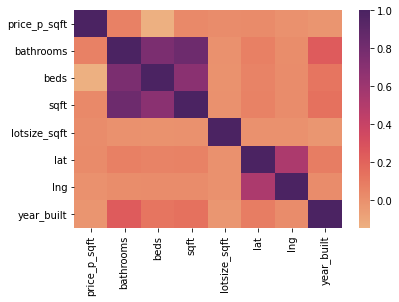

In [ ]:
# correlation between nmerical variables
num_homes = new_homes[['price_p_sqft', 'bathrooms', 'beds', 'sqft', 'lotsize_sqft', 'lat', 'lng', 'year_built']]
corr = num_homes.corr()
sb.heatmap(corr, cmap='flare')

The scatter plot **does not** show a positive relationship between square footage of the property and its price. On contrary, some of the highest per square foot price appear where the square footage is relatively small.

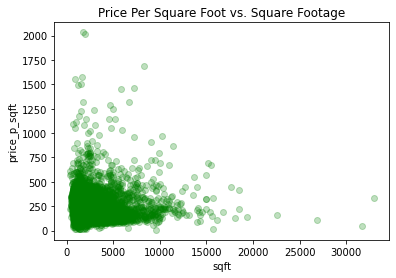

In [ ]:
# scatter plot of home price and home surface area
plt.scatter(new_homes['sqft'], new_homes['price_p_sqft'], c='g', alpha=0.25)
plt.title('Price Per Square Foot vs. Square Footage')
plt.xlabel('sqft')
plt.ylabel('price_p_sqft')
plt.show()

Similar to previous plot, the price of property does not have a significant linear relationship with number of bedrooms. The highest per footage price appears in mid-size properties.

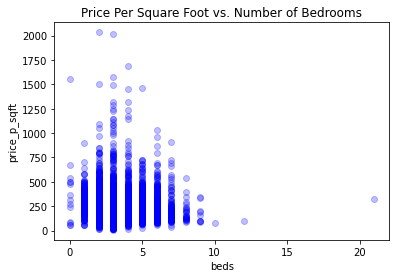

In [ ]:
# plot the relationship between number of bedrooms and price per square foot.
plt.scatter(new_homes['beds'], new_homes['price_p_sqft'], c='b', alpha=0.25)
plt.title('Price Per Square Foot vs. Number of Bedrooms')
plt.xlabel('beds')
plt.ylabel('price_p_sqft')
plt.show()

There's no obvious relationship between number of bathrooms and house price. The houses with 2 to 5 bathrooms tend to have higher unit price.

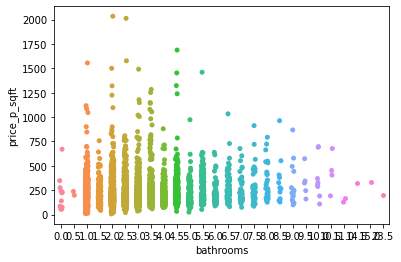

In [ ]:
# use scatter plot to plot the reltionship between number of bathrooms and home price
sb.stripplot(x='bathrooms', y='price_p_sqft', data=new_homes, jitter=True)
plt.show()

### 1.2.2 Categorical data visualzation

The strip plot below shows that townhouses have the lowest per footage price, while the price for single family houses and condos are roughly the same. However, the price for single family houses is more variant, there fore there are more high price examples for single family house.

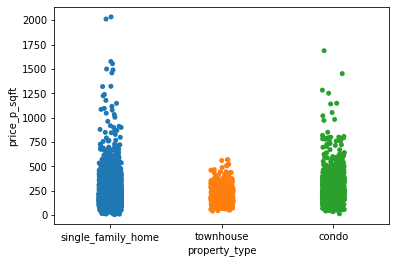

In [ ]:
sb.stripplot(x='property_type', y='price_p_sqft', data=new_homes, jitter=True)
plt.show()

To closer investigate the distribution of the categroical data we previously processed, we can draw bar plots indicating the distriubtion of the data.  
The most common features as we can see are laundry room on main level, no pool, composition roof, central heating and central air for dining room.

In [ ]:
laundry = new_homes['features_laundry'].str.get_dummies(sep=',').sum()
pool = new_homes['features_pool'].str.get_dummies(sep=',').sum()
roof = new_homes['features_roof'].str.get_dummies(sep=',').sum()
dining = new_homes['features_dining_room'].str.get_dummies(sep=',').sum()
heating = new_homes['features_heating'].str.get_dummies(sep=',').sum()


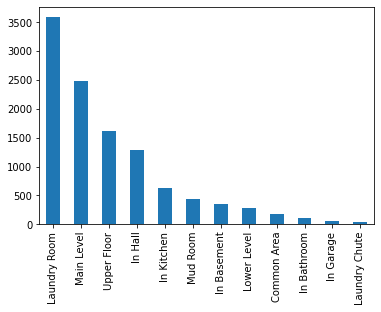

In [ ]:
laundry.sort_values(ascending=False).plot.bar()

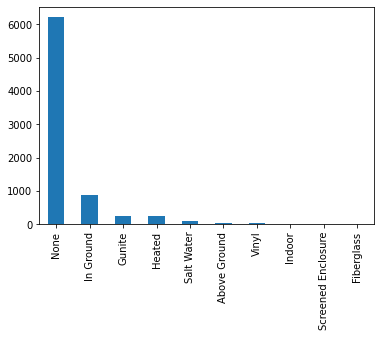

In [ ]:
pool.sort_values(ascending=False).plot.bar()

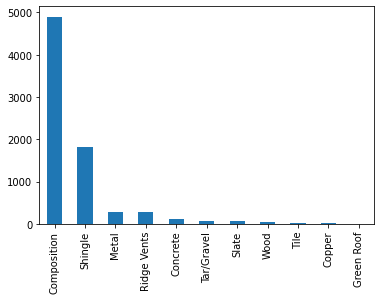

In [ ]:
roof.sort_values(ascending=False).plot.bar()

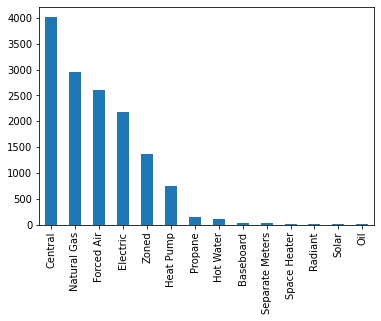

In [ ]:
heating.sort_values(ascending=False).plot.bar()

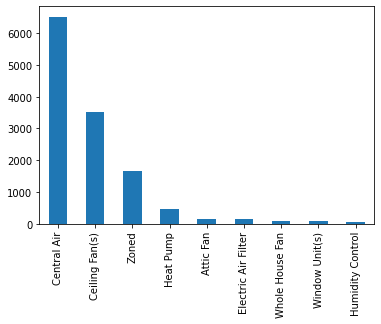

In [ ]:
dining.sort_values(ascending=False).plot.bar()

Now, let's have a closer look to the distribution of the build year of homes listed.  
It's very cleat that most property listed were bult in recent years, mainly between 1990 to 2022.  
However, there is an unusual lack of prperty built in 2010s.

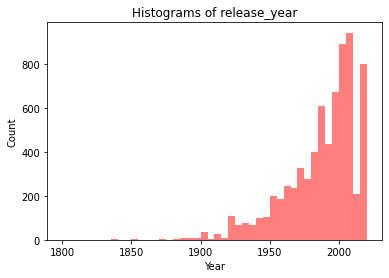

In [ ]:
plt.hist(new_homes['year_built'], density=False, bins=range(1800, 2022, 5), color='r', alpha=0.5, label='year_built')
plt.title('Histograms of release_year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

### 1.2.3 Visualization with map

Since most of the homes listed are either in or around the city of Atlanta. We can print them out on the street map of Atlanta using their longitude and latitude. Here, I used Basemap and arc gis image api to plot the map background and points representing property.  

The color of the points reflects the price. Properties with higher per footage price have deeper shade of red. The size of the point reflects the square footage of the home. Larger the point is, larger is the property.  

From the plot we can see that, most of the properties with high per footage value are in the city centre. There are some houses in the north country that have very high price but it's much more sparse. Generally, we can see larger properties when it's far from city centre. 

In [ ]:
lat = list(new_homes['lat'])
lng = list(new_homes['lng'])
price = list(new_homes['price_p_sqft'])
sqft = list(new_homes['sqft']/100)

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


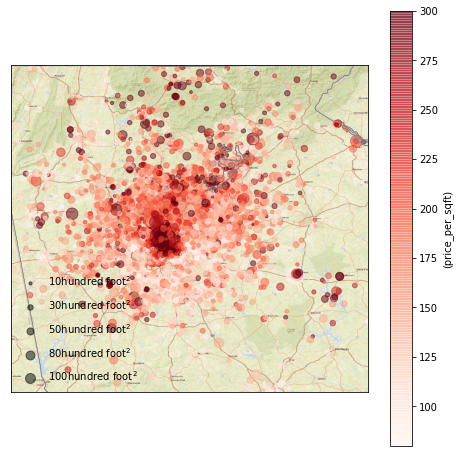

In [ ]:
# 1. draw the map of state of Georgia
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='mill', resolution='f', 
            llcrnrlon=-85.4 ,llcrnrlat=32.8,
        urcrnrlon=-83.0 ,urcrnrlat=35.0, epsg=4269)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.arcgisimage(service="World_Street_Map", xpixels = 1000, verbose= False)

# 2. plot the homes on the map 
m.scatter(lng, lat, latlon=True,
          c=price, s=sqft,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'(price_per_sqft)')
plt.clim(80, 300)

# make legend with dummy points
for a in [10, 30, 50, 80, 100]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + 'hundred foot$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left')

# Part II: Feature Processing

Due to the limited time and resource that we have, we are only going to select a subset of features that are provided. 

## 2.1 Categorical features

In [ ]:
# one-hot encode the catagorical features
d_prop_type = pd.get_dummies(new_homes['property_type'])
d_pool = new_homes['features_pool'].str.get_dummies(sep=',')
d_laundry = new_homes['features_laundry'].str.get_dummies(sep=',')
d_roof = new_homes['features_roof'].str.get_dummies(sep=',')
d_dining = new_homes['features_dining_room'].str.get_dummies(sep=',')
d_kitchen = new_homes['features_kitchen'].str.get_dummies(sep=',')

Year_built to variable

In [ ]:
new_homes['year_built'].min()

1800

In [ ]:
# check the year variable
new_homes['year_built'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

0.100   1954.000
0.200   1972.000
0.300   1984.000
0.400   1991.000
0.500   1999.000
0.600   2003.000
0.700   2007.000
0.800   2017.000
0.900   2021.000
Name: year_built, dtype: float64

In [ ]:
# bin year_built and convert it into dummy variables
bin = [1800, 1954, 1972, 1984, 1991, 1999, 2003, 2007, 2017, 2021, 2022]
year_range = ['1800-1954', '1954-1972', '1972-1984','1984-1991', '1991-1999', '1999-2003', '2003-2007', '2007-2017', '2017-2021', '2021-2022']
year_bin = pd.cut(new_homes['year_built'], bins=bin, labels=year_range)
d_year = pd.get_dummies(year_bin)

**Transformation for ZIP code**
Since neighbouring areas have closer ZIP codes, we can use ZIP as a categorical data.

In [ ]:
new_homes['zip'].describe()

count    8161.000
mean    30237.109
std       279.549
min     22578.000
25%     30076.000
50%     30189.000
75%     30324.000
max     39854.000
Name: zip, dtype: float64

In [ ]:
# bin the zip and convert it into dummy variables
bin = list(range(30000, 32000, 50))
bin.append(22500)
bin.append(40000)
bin = sorted(bin)
year_bin = pd.cut(new_homes['zip'], bins=bin)
d_zip = pd.get_dummies(year_bin)

In [ ]:
# create a new data frame that contains all the dummy variables
temp_homes = new_homes.drop(['property_type', 'features_pool', 'features_laundry', 'features_roof', 
                             'features_dining_room', 'features_interior_features', 'features_kitchen', 'zip', 'description', 'county', 'city', 'school_district',
                             'subdivision', 'year_built', 'features_fireplaces', 'features_fees', 'features_garage', 'features_heating',
                             'features_home_owners_association', 'features_house',  'features_location', 
                            'features_lot', 'features_parking', 'features_pool', 'features_property',
                            'features_property_access', 'features_roof', 'features_schools', 'features_sewer', 
                            'features_taxes', 'features_water', 'features_utilities', 'xf_attributes', 'year_built', 'zip', 'listing_date', 'street', 'state'], axis=1)
labled_homes = pd.concat([temp_homes, d_year, d_zip,d_dining, d_kitchen, d_kitchen, d_laundry, d_pool], axis=1)
labled_homes.head(3)

,id,price_p_sqft,beds,bathrooms,sqft,lotsize_sqft,lat,lng,1800-1954,1954-1972,1972-1984,1984-1991,1991-1999,1999-2003,2003-2007,2007-2017,2017-2021,2021-2022,"(22500, 30000]","(30000, 30050]","(30050, 30100]","(30100, 30150]","(30150, 30200]","(30200, 30250]","(30250, 30300]","(30300, 30350]","(30350, 30400]","(30400, 30450]","(30450, 30500]","(30500, 30550]","(30550, 30600]","(30600, 30650]","(30650, 30700]","(30700, 30750]","(30750, 30800]","(30800, 30850]","(30850, 30900]","(30900, 30950]","(30950, 31000]","(31000, 31050]","(31050, 31100]","(31100, 31150]","(31150, 31200]","(31200, 31250]","(31250, 31300]","(31300, 31350]","(31350, 31400]","(31400, 31450]","(31450, 31500]","(31500, 31550]","(31550, 31600]","(31600, 31650]","(31650, 31700]","(31700, 31750]","(31750, 31800]","(31800, 31850]","(31850, 31900]","(31900, 31950]","(31950, 40000]",Attic Fan,Ceiling Fan(s),Central Air,Electric Air Filter,Heat Pump,Humidity Control,Whole House Fan,Window Unit(s),Zoned,Breakfast Bar,Breakfast Room,Cabinets Other,Cabinets Stain,Cabinets White,Country Kitchen,Eat-in Kitchen,Granite Countertops,Island,Keeping Room,Kitchen Island,Kitchen on Main Level,Laminate Counters,Other Surface Counters,Pantry,Pantry Walk-In,Quartz Countertops,Second Kitchen,Solid Surface Counters,Stainless steel appliances,Stone Counters,Tile Counters,View to Family Room,Wine Rack,Breakfast Bar,Breakfast Room,Cabinets Other,Cabinets Stain,Cabinets White,Country Kitchen,Eat-in Kitchen,Granite Countertops,Island,Keeping Room,Kitchen Island,Kitchen on Main Level,Laminate Counters,Other Surface Counters,Pantry,Pantry Walk-In,Quartz Countertops,Second Kitchen,Solid Surface Counters,Stainless steel appliances,Stone Counters,Tile Counters,View to Family Room,Wine Rack,Common Area,In Basement,In Bathroom,In Garage,In Hall,In Kitchen,Laundry Chute,Laundry Room,Lower Level,Main Level,Mud Room,Upper Floor,Above Ground,Fiberglass,Gunite,Heated,In Ground,Indoor,None,Salt Water,Screened Enclosure,Vinyl
0,1,144.149,4,2.000,1880.000,13717.000,33.404,-84.611,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,170.994,3,2.500,1874.000,nan,33.863,-84.696,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,3,177.885,3,2.000,1664.000,30056.000,33.900,-83.944,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## 2.2 Missing values

In [ ]:
# since most of our varaibles are categorical, wo don't have too many missing values except in sqft and lotsize_sqft
labled_homes.isna().sum()

id                              0
price_p_sqft                  339
beds                            0
bathrooms                       0
sqft                          339
lotsize_sqft                  916
lat                             0
lng                             0
1800-1954                       0
1954-1972                       0
1972-1984                       0
1984-1991                       0
1991-1999                       0
1999-2003                       0
2003-2007                       0
2007-2017                       0
2017-2021                       0
2021-2022                       0
(22500, 30000]                  0
(30000, 30050]                  0
(30050, 30100]                  0
(30100, 30150]                  0
(30150, 30200]                  0
(30200, 30250]                  0
(30250, 30300]                  0
(30300, 30350]                  0
(30350, 30400]                  0
(30400, 30450]                  0
(30450, 30500]                  0
(30500, 30550]

In [ ]:
# fill the missing values with average value of variable
labled_homes['sqft'] = labled_homes['sqft'].fillna(labled_homes['sqft'].mean())
labled_homes['lotsize_sqft'] = labled_homes['sqft'].fillna(labled_homes['sqft'].mean())
labled_homes['price_p_sqft'] = labled_homes['price_p_sqft'].fillna(labled_homes['price_p_sqft'].mean())
labled_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 0 to 8167
Columns: 138 entries, id to Vinyl
dtypes: float64(6), int64(81), uint8(51)
memory usage: 5.9 MB


# Part III: Model Training

To best spot real estate investment opportunity, the ability to valuate and forecast the price of a property is important. Therefore, we can try to use the data set we have to train a model that can efficiently estimate the price of a property.  
Since it's a regression problem, we can start with traditional linear regression with regularization. After that we can try more complex tree based models.

In [ ]:
# before we begin, we can split the data into training set and test set
train, test = train_test_split(labled_homes, test_size=0.15, random_state=3)
train_x = train.drop('price_p_sqft', axis=1)
train_y = train['price_p_sqft']
test_x = test.drop('price_p_sqft', axis=1)
test_y = test['price_p_sqft']

## 3.1 Linear Method

In [ ]:
# load packages
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# to find the best hyper parameter, we can use validatoin set to tune the hyperparameter
lr_train, lr_validate = train_test_split(train, test_size=0.15, random_state = 0)

lr_train_x = lr_train.drop(['price_p_sqft'], axis = 1)
lr_validate_x = lr_validate.drop(['price_p_sqft'], axis = 1)
lr_train_y = lr_train['price_p_sqft']
lr_validate_y = lr_validate['price_p_sqft']


### 3.1.1 Ridge Regression

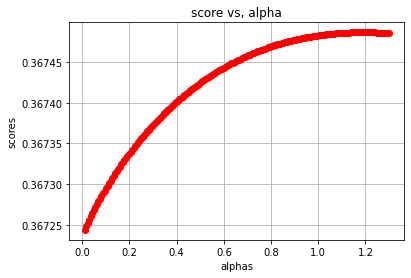

The optimaized alpha and score of Ridge linear is: 


(None, 1.1897989949748744, 0.36748668459958633)

In [ ]:
alphas = np.linspace(0.01,1.3,200)
scores = np.empty_like(alphas)
opt_a = -float('inf')
max_score = -float('inf')

for i, a in enumerate(alphas):
  ridge = Ridge()
  ridge.set_params(alpha=a)
  ridge.fit(lr_train_x, lr_train_y)
  scores[i] = ridge.score(lr_validate_x, lr_validate_y)
  if scores[i] > max_score:
    max_score = scores[i]
    opt_a = a
    ridge_save = ridge

plt.plot(alphas, scores, color='r', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alphas')
plt.ylabel('scores')
plt.grid(True)
plt.title('score vs, alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
# fit the best ridge model with optimal alpha
ridge_f = Ridge()
ridge_f.set_params(alpha = opt_a)
ridge_f.fit(train_x, train_y)

Ridge(alpha=1.1897989949748744, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### 3.1.2 LASSO

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20840629.737451356, tolerance: 93948.72025537443
  positive)


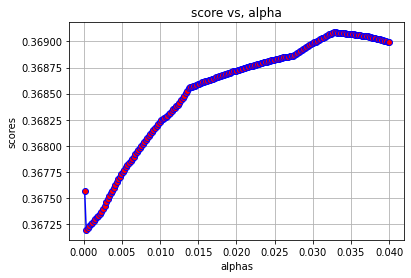

The optimaized alpha and score of Ridge linear is: 


(None, 0.03278190954773869, 0.3690876882253781)

In [ ]:
alphas = np.linspace(0.0001,0.04,200)
scores = np.empty_like(alphas)
opt_a = -float('inf')
max_score = -float('inf')

for i, a in enumerate(alphas):
  lasso = Lasso(max_iter=10000, tol=0.001)
  lasso.set_params(alpha=a)
  lasso.fit(lr_train_x, lr_train_y)
  scores[i] = lasso.score(lr_validate_x, lr_validate_y)
  if scores[i] > max_score:
    max_score = scores[i]
    opt_a = a
    lasso_save = ridge

plt.plot(alphas, scores, color='b', marker='o',markerfacecolor='r', markersize=6)
plt.xlabel('alphas')
plt.ylabel('scores')
plt.grid(True)
plt.title('score vs, alpha')
plt.show()
print ('The optimaized alpha and score of Ridge linear is: '), opt_a, max_score

In [ ]:
# fit the bet Lasso model with optimal alpha
lasso_f = Lasso()
lasso_f.set_params(alpha = opt_a)
lasso_f.fit(train_x, train_y)

Lasso(alpha=0.03278190954773869, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

## 3.2 Tree Based Method

### 3.2.1 Random Forest

Here we use GridSearchCV to build a grid search to tune the best number of trees and the best interaction depth. As the result shows, the model with 500 estimators and interaction depth of 13 gives the best cross validation result. The validation test score is around 0.63 for this model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(random_state = 2, max_features = 'sqrt')
param_grid = {'n_estimators':[500, 700, 800, 900], 'max_depth':[20, 21, 22, 23, 24]}
clf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
clf.fit(train_x, train_y) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=2,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs=

In [ ]:
clf.cv_results_

{'mean_fit_time': array([ 5.7214252 ,  8.22369661,  9.48039713, 10.4601212 ,  5.670121  ,
         8.08058286,  8.95908642, 10.58652024,  5.92667017,  8.26288385,
         9.4588192 , 10.30276108,  5.76131682,  8.26283617,  9.35909162,
        10.50062475,  6.04666314,  8.3536592 ,  9.64873986, 10.75272217]),
 'mean_score_time': array([0.24140944, 0.34615278, 0.39837589, 0.43948169, 0.25317039,
        0.35168133, 0.40023532, 0.55755816, 0.26112452, 0.36794281,
        0.4243166 , 0.46045156, 0.26102972, 0.37699118, 0.41751041,
        0.4798975 , 0.2726449 , 0.37514305, 0.43717499, 0.48484406]),
 'mean_test_score': array([0.37864479, 0.37915812, 0.37936147, 0.37952187, 0.38087812,
        0.38035642, 0.3802643 , 0.38031024, 0.38057732, 0.37984261,
        0.38044885, 0.38062941, 0.38203286, 0.38175675, 0.38182006,
        0.38211886, 0.38189039, 0.38209322, 0.38191245, 0.38243005]),
 'param_max_depth': masked_array(data=[20, 20, 20, 20, 21, 21, 21, 21, 22, 22, 22, 22, 23, 23,
        

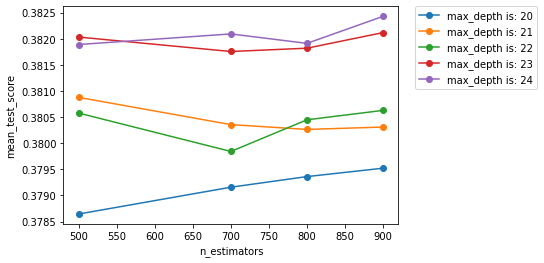

The best parameter for max_depth is: 24
The best parameter for n_estimator is: 900


In [ ]:
# plot the cross validation result
max_depth = [20, 21, 22, 23, 24]
n_estimators = [500, 700, 800, 900]
scores = clf.cv_results_['mean_test_score'].reshape(len(max_depth), len(n_estimators))
plt.figure(1)
plt.subplot(1,1,1)
for i, j in enumerate(max_depth):
  plt.plot(n_estimators, scores[i], '-o', label="max_depth is: "+str(j))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("n_estimators")
plt.ylabel("mean_test_score")
plt.show()
print("The best parameter for max_depth is: " + str(clf.best_params_['max_depth']))
print("The best parameter for n_estimator is: " + str(clf.best_params_['n_estimators']))

### 3.2.2 Boosted trees

In [ ]:
reg = GradientBoostingRegressor(random_state=0)
bt_param_grid = {'learning_rate':[0.01, 0.1, 1], 'n_estimators':[500, 800, 1000], 'max_depth':[1, 2, 3]}
clf_bt = GridSearchCV(reg, bt_param_grid, cv=5)
clf_bt.fit(train_x, train_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
clf_bt.cv_results_

{'mean_fit_time': array([ 4.15956445,  6.3855226 ,  8.1059618 ,  7.72916188, 12.25197258,
        15.52634816, 11.5047729 , 18.35505657, 23.09376421,  4.2123034 ,
         6.72581658,  8.49961762,  7.9660234 , 12.78141265, 15.91598649,
        11.65989699, 18.58100543, 23.16052341,  4.23929377,  6.72841878,
         8.4510365 ,  7.95032039, 12.61784711, 15.73477392, 11.51448689,
        18.46439304, 22.96143069]),
 'mean_score_time': array([0.00899258, 0.01151676, 0.01402431, 0.01369538, 0.01794791,
        0.02122345, 0.01740613, 0.02385793, 0.02976041, 0.00966163,
        0.0121778 , 0.01484103, 0.01202345, 0.01642714, 0.01887412,
        0.01499701, 0.02018933, 0.02400179, 0.0085989 , 0.01171513,
        0.01169724, 0.01135941, 0.01538653, 0.01821175, 0.01477847,
        0.01982465, 0.02427449]),
 'mean_test_score': array([ 0.2247145 ,  0.24206196,  0.25034733,  0.28878393,  0.30504491,
         0.31108066,  0.33571531,  0.35065088,  0.35558293,  0.29612537,
         0.30539408,  0.

In [ ]:
# print the best hypr parameters
print("The best parameter for max_depth is: " + str(clf_bt.best_params_['max_depth']))
print("The best parameter for n_estimator is: " + str(clf_bt.best_params_['n_estimators']))
print("The best parameter for learning_rate is: " + str(clf_bt.best_params_['learning_rate']))

The best parameter for max_depth is: 3
The best parameter for n_estimator is: 500
The best parameter for learning_rate is: 0.1


# Part IV: Model Evaluation

## 4.1 Evaluate all models

For model evaluation, we can calculate the test MSE for the models we have got.

In [ ]:
# MSE for Ridge Regression
pred_y = ridge_f.predict(test_x)
ridge_score = ridge_f.score(test_x, test_y)  # here we use the stored best model we had in 3.1.1
MSE_ridge = mean_squared_error(test_y, pred_y)
RMSE_ridge = np.sqrt(MSE_ridge)
print ('ridge score: ', ridge_score)
print ('Mean square error of ridge: ', MSE_ridge)
print ('Root mean squared error of ridge:', RMSE_ridge)

ridge score:  0.2665486433209219
Mean square error of ridge:  12230.198821284319
Root mean squared error of ridge: 110.59022932105856


In [ ]:
# MSE for Lasso
from sklearn.metrics import mean_squared_error
pred_y = lasso_f.predict(test_x)  # here we use the stored best model we had in 3.1.2
lasso_score = lasso_f.score(test_x, test_y)
MSE_lasso = mean_squared_error(test_y, pred_y)
RMSE_lasso = np.sqrt(MSE_lasso)
print ('lasso score: ', lasso_score)
print ('Mean square error of lasso: ', MSE_lasso)
print ('Root mean squared error of lasso:', RMSE_lasso)

lasso score:  0.26536933081831615
Mean square error of lasso:  12249.863692373521
Root mean squared error of lasso: 110.67910232909156


In [ ]:
# MSE for Random Forest
from sklearn.ensemble import RandomForestRegressor
df = RandomForestRegressor(n_estimators=clf.best_params_['n_estimators'], max_depth=clf.best_params_['max_depth'], max_features="sqrt", random_state=2, n_jobs=-1)
rf.fit(train_x, train_y)
pred_y = rf.predict(test_x)
rf_score = rf.score(test_x, test_y)
MSE_rf = mean_squared_error(test_y, pred_y)
RMSE_rf = np.sqrt(MSE_rf)
print ('rf score: ', rf_score)
print ('Mean square error of rf: ', MSE_rf)
print ('Root mean squared error of rf:', RMSE_rf)

rf score:  0.4096187554803624
Mean square error of rf:  9844.524705122012
Root mean squared error of rf: 99.21957823495326


In [ ]:
# MSE for Random Forest
bt = GradientBoostingRegressor(learning_rate=clf_bt.best_params_['learning_rate'], n_estimators=clf_bt.best_params_['n_estimators'],max_depth = clf_bt.best_params_['max_depth'], random_state=3 )
bt.fit(train_x, train_y)
pred_y = bt.predict(test_x)
bt_score = bt.score(test_x, test_y)
MSE_bt = mean_squared_error(test_y, pred_y)
RMSE_bt = np.sqrt(MSE_bt)
print ('bt score: ', bt_score)
print ('Mean square error of bt: ', MSE_bt)
print ('Root mean squared error of bt:', RMSE_bt)

bt score:  0.3462340652083078
Mean square error of bt:  10901.455552946383
Root mean squared error of bt: 104.4100356907629


## 4.2 Model comparison

To compare the model, we can draw three simple figures that show the test score, MSE and RMSE of the models. We can see that the random forest model has clear advantange over linear methods. Which also confirms our previous observation that there's no obvious linear relationship between variables.

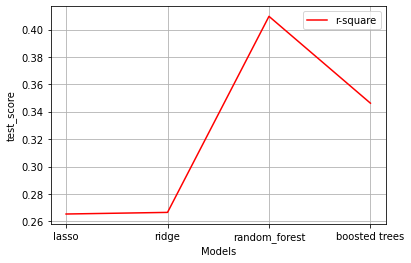

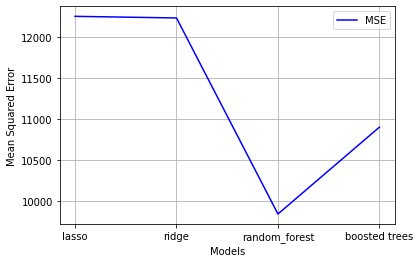

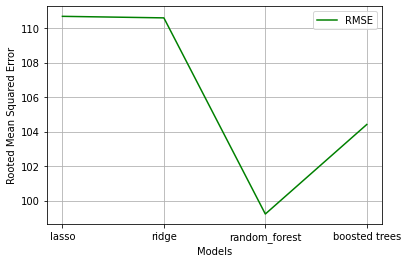

In [ ]:
lst_model = ['lasso', 'ridge', 'random_forest', 'boosted trees']
lst_score = [lasso_score, ridge_score, rf_score, bt_score]
lst_MSE = [MSE_lasso, MSE_ridge, MSE_rf, MSE_bt]
lst_RMSE = [RMSE_lasso, RMSE_ridge, RMSE_rf, RMSE_bt]

# plot score
plt.figure(1)
plt.plot(lst_model, lst_score, color="r")
plt.grid()
plt.xlabel('Models')
plt.ylabel('test_score')
plt.legend(['r-square'])
plt.show()

# plot MSE
plt.figure(2)
plt.plot(lst_model, lst_MSE, color='b')
plt.grid()
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.legend(['MSE'])
plt.show()

# plot RMSE
plt.figure(3)
plt.plot(lst_model, lst_RMSE, color='g')
plt.grid()
plt.xlabel('Models')
plt.ylabel('Rooted Mean Squared Error')
plt.legend(['RMSE'])
plt.show()

## 4.3 Feature importance

Finally, we can use the random forest to conclude which features are the most important in predicting property prices. 

From the feature importance plot we can see that, among the fifteen most significant features, there are many interesting variables. 

It is a surprise that the random forest model has successfully recognized the zip codes of city of Atlanta, which are within the range (30300, 30350). The size of the property can also explain, at least partly, the price of the house. It's comprehensible since some of the luxury houses also have very high per footage price.  


In [ ]:
importance = rf.feature_importances_
feature_name = train_x.columns.values
importance_chart = pd.DataFrame(feature_name, importance)
importance_chart.reset_index(inplace=True)
importance_chart.rename(columns={'index':'importance', 0:'features'},inplace=True)
importance_chart.sort_values('importance', ascending=False, inplace=True)
importance_chart.reset_index(drop=True, inplace=True)

In [ ]:
importance_chart.loc[1:10,]

,importance,features
1,0.088,lng
2,0.069,"(30300, 30350]"
3,0.066,sqft
4,0.063,lotsize_sqft
5,0.053,id
6,0.043,beds
7,0.035,bathrooms
8,0.014,Heated
9,0.012,In Ground
10,0.012,Ceiling Fan(s)


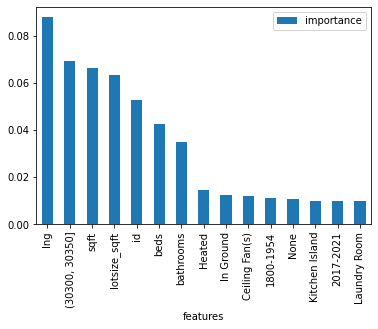

In [ ]:
high_importance = importance_chart.loc[1:15]
high_importance.plot.bar(x='features')
plt.xticks(rotation=90)
plt.show()

# Part V: Summary

Apparently, there is some imperfection in this analysis. If I had more time, I would have a closer look to the feature variables. For the 'features_schools', I think it's feasible to use school-digger api to find the rank of schools approximate to the property to better predict the house price.  

"xf_attributes" is a giant variable. There are on average more than 200 features per property. If I had more time, I would try to apply word2vec and use neural network to avoid feature engineering. Also, I would use cross validation instead of validation set method when tuning hyper-parameters for ridge and lasso.

**Before getting to conclusion**, we can first recall what has been done. I first cleaned the data by dropping all the NA columns and redundant columns. And then, I used apply method and string method to transform all the unstructured qualitative data to a comma seperated from. Which made it easier for us to one-hot encode some of the qualitative variables.  

Then, I visualized some of the quantitative and qualitative variables to gain an intuitive understanding of the data and relationship between variables. Also I have introduced Basemap and Arc Gis Image API to plot the property listed on the map of Atlanta. From the map, we can clearly see the pattern of distribution of house price. High value properties are mainly concentrated in the city centre. And the house price of north side of the city is generally higher than that of the south side of the city.

After filling all the NA value with mean value, I tried to fit ridge regression, Lasso, random forest model and grandient boosting trees to the data to predict property price. By applying test set method and cross-validation, I got the best hyper-parameter for the models. Using the best model, I calculated the test MSE to compare the models and concluded that the random forest model performed the best. Boosted trees, while performing pretty better than linear modles, is not as good as random forest using the parameters I got. Finally, I retrieved the most significant predictors using the importance method of random forest model.

**In conclusion**, apparently, being closer to city centre means a bigger chance of high price per square foot. And this pattern was reflected by the high importance of zip code being between (30300, 30350). However, by taking a closer look at the feature importance report, we can find that the number of bathrooms is also a very important feature. What's more, Kitch island, heating and longitude are also important. And this has inspired us that alternative features can also have a large influence on property price. By monitoring these features, we can better forecast or evaluate home prices, which leads us to better investment decisions.

Hantang LI
11/12/2021